In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Laden der Daten und Mapping auf die Stunde genau

## Diese Zelle ausführen, wenn die Datei ./purchases.csv existiert

In [ ]:
df = pd.read_csv("./purchases.csv")

## Nachfolgende Zellen ausführen wenn ./purchases.csv noch nicht exisitert

In [3]:
df = pd.read_csv("./purchases.txt", delimiter="\t", names = ['date', 'time', 'place', 'type', 'price', 'payment_type'])

In [4]:
df['time_split'] = df.apply(lambda x: x['time'][:2], axis = 1, result_type = 'expand')

In [5]:
def decimal_time(row : pd.Series) -> float:
    time = row['time']
    hh = int(time[:2])
    mm = int(time[3:])
    return hh + (mm / 60)
    
df['time_decimal'] = df.apply(lambda row: decimal_time(row), axis = 1, result_type = 'expand')

In [6]:
df.to_csv("./purchases.csv", index = False)

## Ab hier normal weiterfahren

In [7]:
df.head(10)

,date,time,place,type,price,payment_type,time_split,time_decimal
0,2012-01-01,09:00,San Jose,Men's Clothing,214.05,Amex,09,9.0
1,2012-01-01,09:00,Fort Worth,Women's Clothing,153.57,Visa,09,9.0
2,2012-01-01,09:00,San Diego,Music,66.08,Cash,09,9.0
3,2012-01-01,09:00,Pittsburgh,Pet Supplies,493.51,Discover,09,9.0
4,2012-01-01,09:00,Omaha,Children's Clothing,235.63,MasterCard,09,9.0
5,2012-01-01,09:00,Stockton,Men's Clothing,247.18,MasterCard,09,9.0
6,2012-01-01,09:00,Austin,Cameras,379.60,Visa,09,9.0
7,2012-01-01,09:00,New York,Consumer Electronics,296.80,Cash,09,9.0
8,2012-01-01,09:00,Corpus Christi,Toys,25.38,Discover,09,9.0
9,2012-01-01,09:00,Fort Worth,Toys,213.88,Visa,09,9.0


# Berechnen diverser statistischen Werten

In [8]:
df.groupby('time_split').mean()

,price,time_decimal
time_split,,
09,249.672185,9.491523
10,250.056104,10.491549
11,249.928080,11.491673
12,249.855358,12.491879
13,250.258298,13.491775
14,249.822076,14.491908
15,250.073113,15.491356
16,250.243684,16.491623
17,249.740575,17.491734


In [9]:
df.groupby('time_split')['price'].max()

time_split
09    499.99
10    499.99
11    499.99
12    499.99
13    499.99
14    499.99
15    499.99
16    499.99
17    499.99
Name: price, dtype: float64

In [10]:
df.groupby('time_split')['price'].min()

time_split
09    0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
Name: price, dtype: float64

In [11]:
df.groupby('time_split')['price'].std()

time_split
09    144.404425
10    144.497425
11    144.269663
12    144.284005
13    144.282950
14    144.435415
15    144.145912
16    144.229889
17    144.306676
Name: price, dtype: float64

In [12]:
df[['time_split', 'price']].head(5)

,time_split,price
0,09,214.05
1,09,153.57
2,09,66.08
3,09,493.51
4,09,235.63


# Top 10 der Umsatzstärksten Filialen

In [13]:
df.groupby('place')[['place', 'price']].sum().sort_values(by='price')[-10:]

,price
place,
Sacramento,10123468.18
Baton Rouge,10131273.23
Fort Wayne,10132594.02
Irving,10133944.08
Washington,10139363.39
Cincinnati,10139505.74
Newark,10144052.80
Laredo,10144604.98
Durham,10153890.21


# Diagramme

In [14]:
df_grouped_time_dec = df.groupby('time_decimal')[['time_decimal', 'price']].mean()

In [15]:
df_grouped_time_split = df.groupby('time_split')[['time_decimal', 'price']].mean()

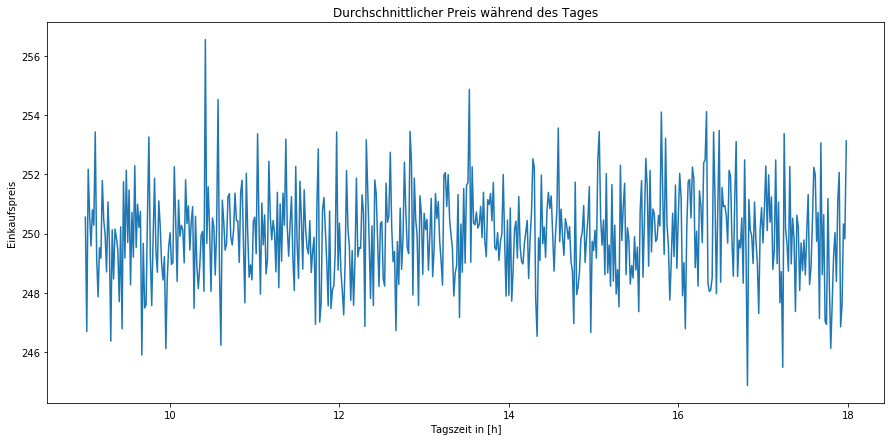

In [16]:
fig, ax = plt.subplots(1,1, figsize=(15, 7))
_ = ax.plot(df_grouped_time_dec['time_decimal'], df_grouped_time_dec['price'])
_ = ax.set_title("Durchschnittlicher Preis während des Tages")
_ = ax.set_xlabel("Tagszeit in [h]")
_ = ax.set_ylabel("Einkaufspreis")

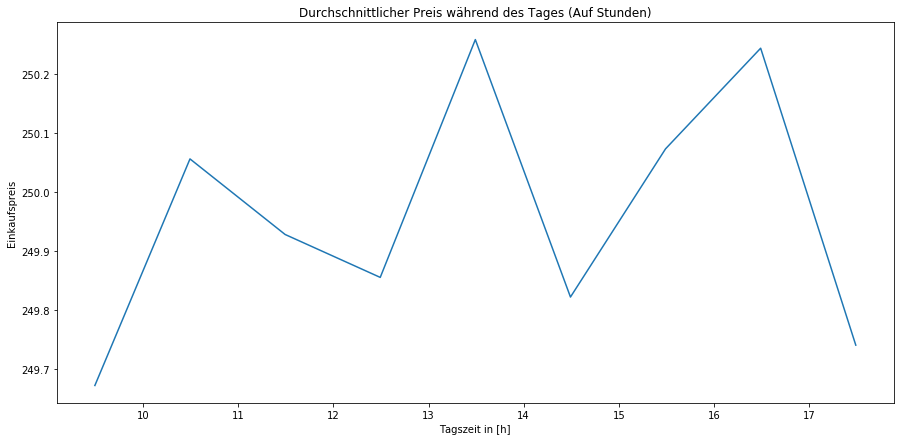

In [17]:
fig, ax = plt.subplots(1,1, figsize=(15, 7))
_ = ax.plot(df_grouped_time_split['time_decimal'], df_grouped_time_split['price'])
_ = ax.set_title("Durchschnittlicher Preis während des Tages (Auf Stunden)")
_ = ax.set_xlabel("Tagszeit in [h]")
_ = ax.set_ylabel("Einkaufspreis")

In [18]:
df_group_earnings = df.groupby('place')[['place', 'price']].sum().sort_values(by='price')

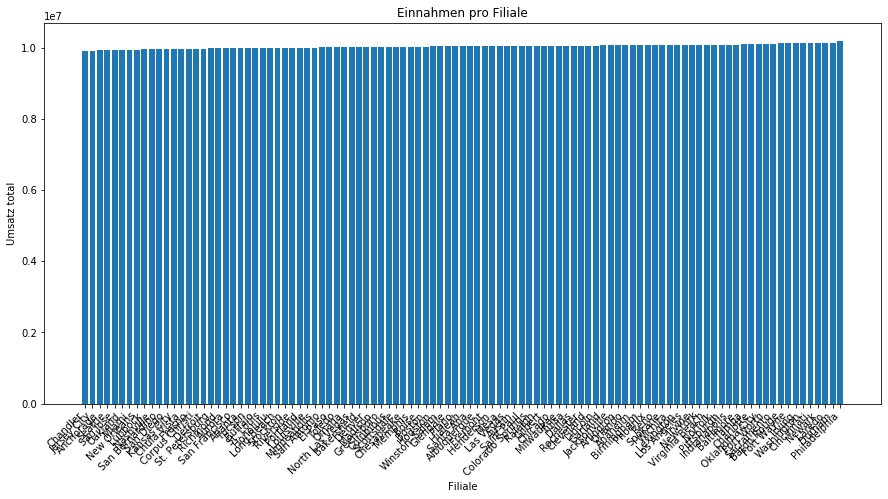

In [19]:
fig, ax = plt.subplots(1,1, figsize=(15, 7))
_ = ax.bar(df_group_earnings.index, df_group_earnings['price'])
_ = ax.set_title("Einnahmen pro Filiale")
_ = ax.set_xlabel("Filiale")
_ = ax.set_ylabel("Umsatz total")
_ = plt.xticks(rotation=45, ha='right')